In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
df = pd.read_csv("TSLA_stock_data.csv")


In [4]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.27,1.67,1.17,1.59,1.59,281494500
1,2010-06-30,1.72,2.03,1.55,1.59,1.59,257806500
2,2010-07-01,1.67,1.73,1.35,1.46,1.46,123282000
3,2010-07-02,1.53,1.54,1.25,1.28,1.28,77097000
4,2010-07-06,1.33,1.33,1.06,1.07,1.07,103003500


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3522 non-null   object 
 1   Open       3522 non-null   float64
 2   High       3522 non-null   float64
 3   Low        3522 non-null   float64
 4   Close      3522 non-null   float64
 5   Adj Close  3522 non-null   float64
 6   Volume     3522 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 192.7+ KB


In [6]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,3522.00,3522.00,3522.00,3522.00,3522.00,3522.00
mean,74.45,76.07,72.71,74.43,74.43,96765201.05
std,102.02,104.27,99.55,101.94,101.94,78816657.97
min,1.08,1.11,1.00,1.05,1.05,1777500.00
25%,11.39,11.67,11.10,11.41,11.41,47407275.00
50%,17.37,17.62,17.04,17.37,17.37,81991800.00
75%,151.42,155.08,146.60,149.91,149.91,122561625.00
max,411.47,414.50,405.67,409.97,409.97,914082000.00


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')


In [8]:
df.head()
df.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
3517,2024-06-20,184.68,185.21,179.66,181.57,181.57,55893100
3518,2024-06-21,182.30,183.95,180.69,183.01,183.01,63029500
3519,2024-06-24,184.97,188.80,182.55,182.58,182.58,61992100
3520,2024-06-25,184.40,187.97,182.01,187.35,187.35,63678300
3521,2024-06-26,186.54,197.76,186.36,196.37,196.37,94942200


In [9]:
df.isnull().sum()


,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns


Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

In [11]:
df['daily_return'] = df['adj_close'].pct_change() * 100


In [12]:
df['ma_20'] = df['adj_close'].rolling(window=20).mean()
df['ma_50'] = df['adj_close'].rolling(window=50).mean()


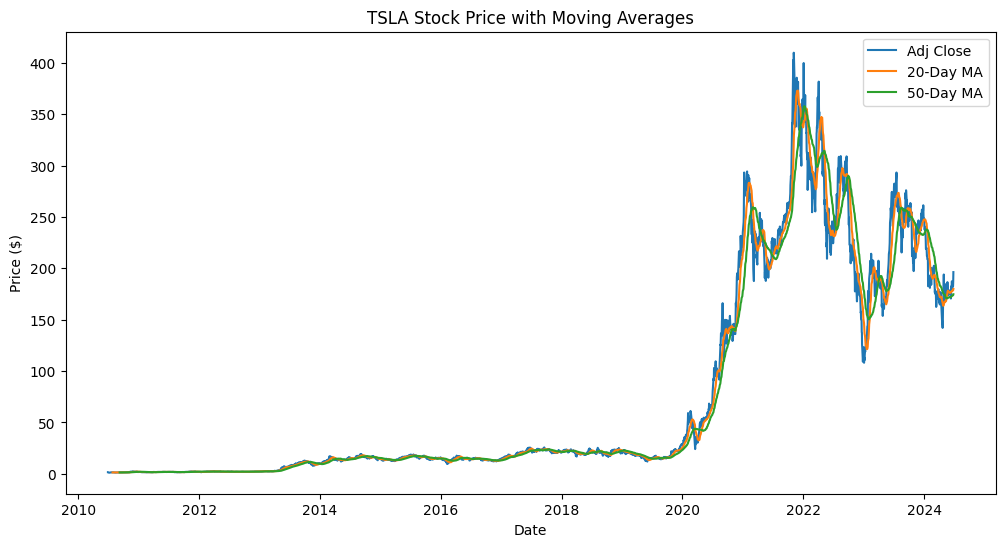

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['adj_close'], label='Adj Close')
plt.plot(df['date'], df['ma_20'], label='20-Day MA')
plt.plot(df['date'], df['ma_50'], label='50-Day MA')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('TSLA Stock Price with Moving Averages')
plt.legend()
plt.show()


In [14]:
df['rolling_volatility_20'] = df['daily_return'].rolling(window=20).std()


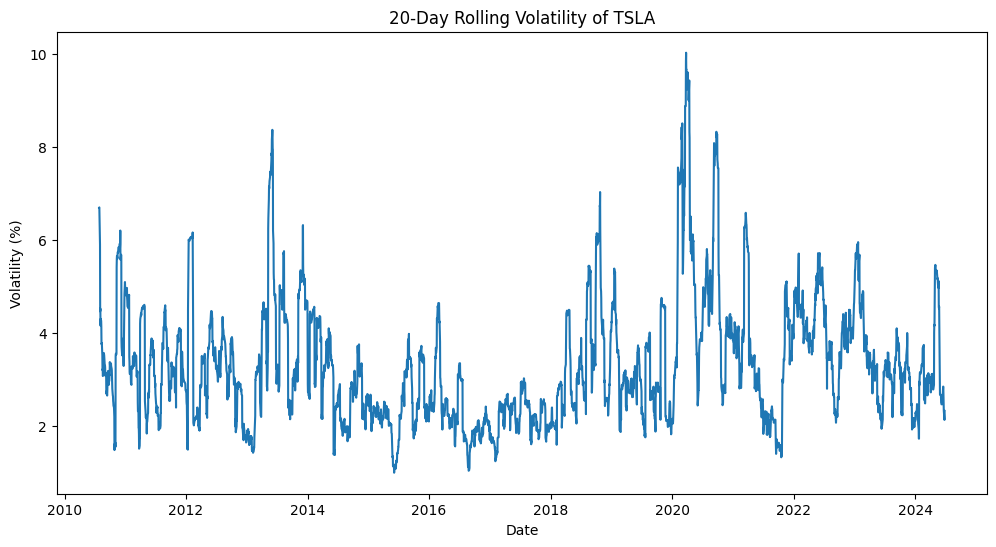

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['rolling_volatility_20'])
plt.title('20-Day Rolling Volatility of TSLA')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.show()


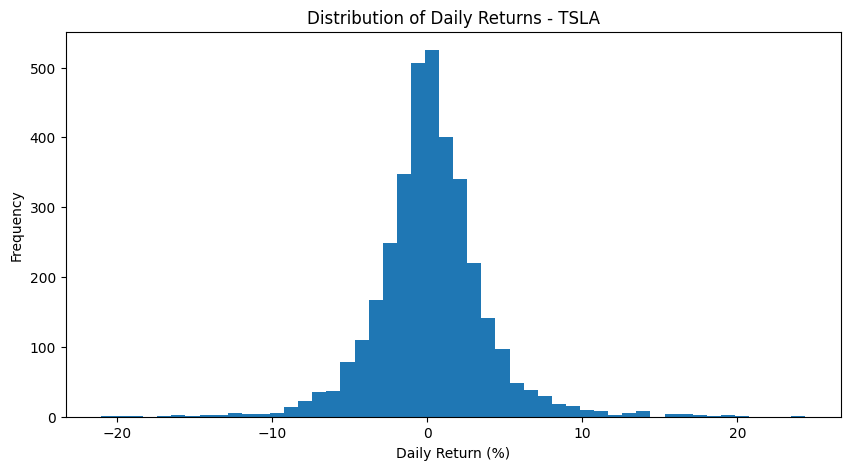

In [16]:
plt.figure(figsize=(10,5))
plt.hist(df['daily_return'], bins=50)
plt.title('Distribution of Daily Returns - TSLA')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.show()


In [17]:
var_95 = np.percentile(df['daily_return'], 5)
var_99 = np.percentile(df['daily_return'], 1)

print(f"95% Value at Risk (VaR): {var_95:.2f}%")
print(f"99% Value at Risk (VaR): {var_99:.2f}%")


95% Value at Risk (VaR): nan%
99% Value at Risk (VaR): nan%


In [18]:
df['cumulative_return'] = (1 + df['daily_return']/100).cumprod()


In [19]:
df['rolling_max'] = df['cumulative_return'].cummax()
df['drawdown'] = (df['cumulative_return'] - df['rolling_max']) / df['rolling_max']


In [20]:
max_drawdown = df['drawdown'].min()
print(f"Maximum Drawdown: {max_drawdown:.2%}")


Maximum Drawdown: -73.63%


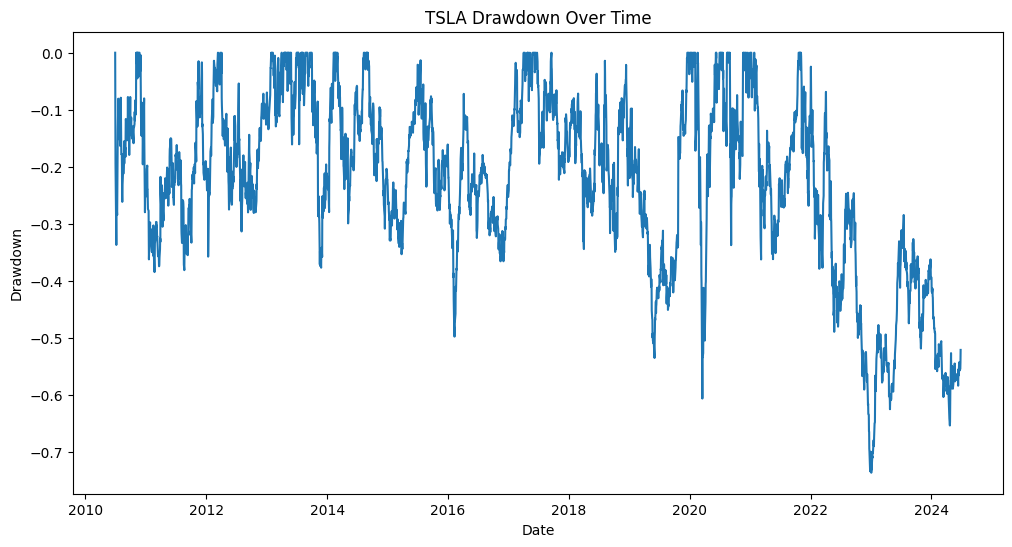

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['drawdown'])
plt.title('TSLA Drawdown Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.show()


In [22]:
risk_summary = {
    "Metric": [
        "Average Daily Return (%)",
        "Daily Volatility (%)",
        "95% Value at Risk (%)",
        "99% Value at Risk (%)",
        "Maximum Drawdown (%)"
    ],
    "Value": [
        df['daily_return'].mean(),
        df['daily_return'].std(),
        var_95,
        var_99,
        max_drawdown * 100
    ]
}

risk_df = pd.DataFrame(risk_summary)
risk_df


,Metric,Value
0,Average Daily Return (%),0.20
1,Daily Volatility (%),3.58
2,95% Value at Risk (%),NaN
3,99% Value at Risk (%),NaN
4,Maximum Drawdown (%),-73.63
